In [ ]:
# Canadian Cheese Production vs. Provincial Temperature

This notebook explores potential correlations between the number of cheese products manufactured per Canadian province and the average temperature of those provinces.

### Objective
- Determine if climate might impact cheese production.
- Demonstrate data cleaning, analysis, and visualization skills.


In [ ]:
import pandas as pd # Import the pandas library, commonly used for data manipulation and analysis.

# Load the dataset
cheese_df = pd.read_csv("cheese_data.csv")

# Clean column names by removing leading/trailing whitespace.
cheese_df.columns = cheese_df.columns.str.strip()

# Filter out rows where 'ManufacturerProvCode' is missing (NaN - Not a Number).
cheese_df = cheese_df[cheese_df['ManufacturerProvCode'].notna()]
# Further filter out rows where 'ManufacturerProvCode' is an empty string after stripping whitespace.
cheese_df = cheese_df[cheese_df['ManufacturerProvCode'].str.strip() != ""]

# Select only the relevant columns for the cleaned dataset.
cheese_df_cleaned = cheese_df[['CheeseName', 'ManufacturerProvCode', 'MilkTypeEn', 'Organic', 'CategoryTypeEn']]

# Save the cleaned data to a new CSV file named 'cleaned_cheese_data.csv'.
cheese_df_cleaned.to_csv("cleaned_cheese_data.csv", index=False)

print("Cheese data cleaned and saved as cleaned_cheese_data.csv")


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cheese data
cheese_df = pd.read_csv("cleaned_cheese_data.csv")

# Load temperature data
temp_df = pd.read_csv("Canada_Temperature_Data.csv")


In [13]:
# Clean cheese data
cheese_df.columns = cheese_df.columns.str.strip()
cheese_counts = cheese_df['ManufacturerProvCode'].value_counts().reset_index()
cheese_counts.columns = ['Province', 'CheeseCount']

# Clean temperature data
temp_df = temp_df[['Prov', 'Tm']].dropna()
temp_df = temp_df[temp_df['Prov'].str.strip() != ""]
avg_temp = temp_df.groupby('Prov').mean(numeric_only=True).reset_index()
avg_temp.columns = ['Province', 'AvgTemp_C']

# Merge datasets
merged_df = pd.merge(cheese_counts, avg_temp, on='Province')


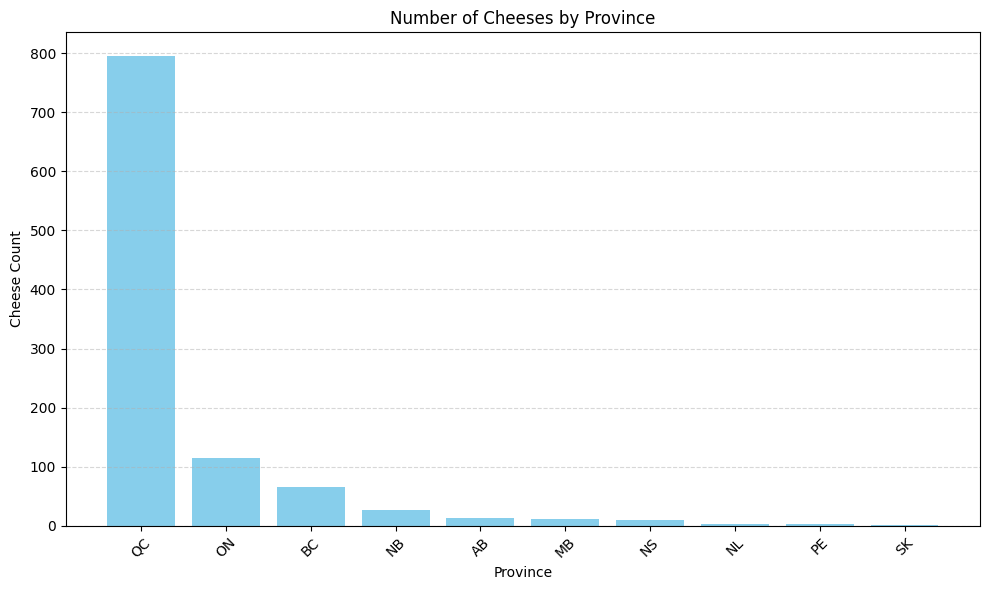

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(merged_df['Province'], merged_df['CheeseCount'], color='skyblue')
plt.title('Number of Cheeses by Province')
plt.xlabel('Province')
plt.ylabel('Cheese Count')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


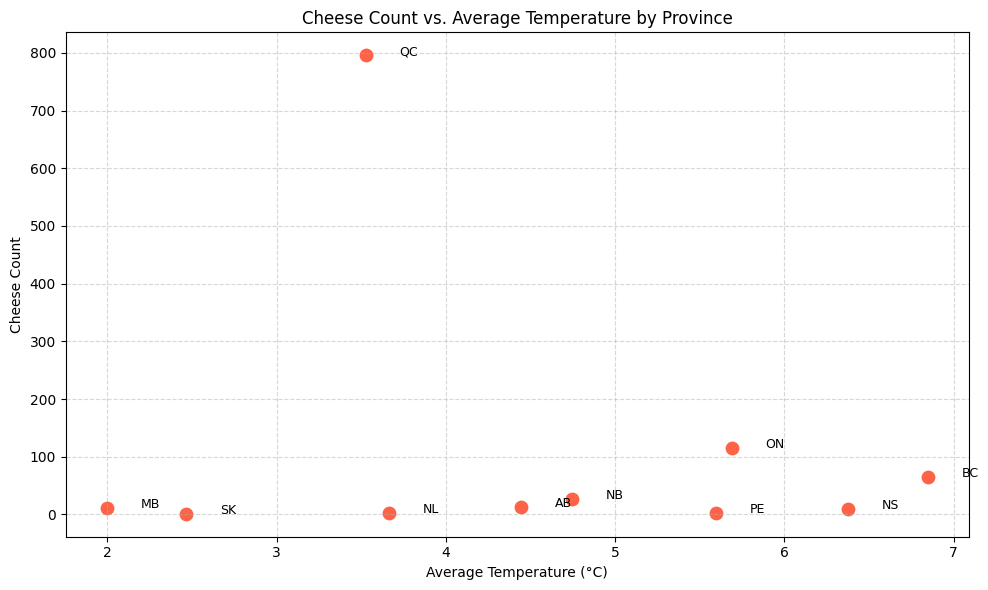

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['AvgTemp_C'], merged_df['CheeseCount'], color='tomato', s=80)

for i, row in merged_df.iterrows():
    plt.text(row['AvgTemp_C'] + 0.2, row['CheeseCount'], row['Province'], fontsize=9)

plt.title('Cheese Count vs. Average Temperature by Province')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Cheese Count')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
### Insights

- Quebec (QC) leads in cheese production, far more than any other province.
- There isn’t a clear temperature-to-cheese relationship. For example, Quebec is colder but dominates production.
- Factors like population, dairy industry history, and agricultural infrastructure likely matter more than climate.

### Temperature vs Causation
While some warmer provinces have fewer cheese products, we cannot conclude temperature limits cheese output directly.

In [ ]:
### Summary
Analyzed the relationship between cheese production and average temperature across Canadian provinces.

Used two main datasets:

The Canadian Cheese Directory, which includes cheese types and manufacturing provinces.

A temperature dataset providing average annual temperatures by province.

Cleaned and merged the data to allow for comparison.

Created two visualizations:

A bar chart showing cheese counts per province.

A scatter plot comparing cheese counts to average temperatures.

Key findings:

Quebec produces the most cheese by far.

There was no strong correlation between average temperature and cheese output.

Factors like infrastructure, industry scale, and history likely explain more than climate.

Why canada_weather.csv Was Not Used?
The file contains temperature data at the community or weather station level, not province level.

Using it would have required mapping each location to a province and calculating provincial averages.

Given the scope and time constraints of the project, it made more sense to use the dataset that already included province-level temperature data.

### With More Time, I Would:
- Use seasonal or monthly temperature averages.
- Bring in economic or dairy farm density data per province.
- Build a dashboard for interactive analysis.

**Prepared by:** Sriharish Eswarathas
